In [16]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt  
okt = Okt() 
import tensorflow as tf
import numpy as np
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt


import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import matplotlib.pyplot as plt 
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [27]:
import seaborn as sns
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

### 데이터 불러오기

In [3]:
year40 = pd.read_csv('year40.csv')
year50 = pd.read_csv('year50.csv')
year60 = pd.read_csv('year60.csv')
year70 = pd.read_csv('year70.csv')
year80 = pd.read_csv('year80.csv')
year90 = pd.read_csv('year90.csv')
year20 = pd.read_csv('year20.csv')
year2010 = pd.read_csv('year2010.csv')

In [4]:
year40.head(3)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
0,1373123,신라의 달밤,현인,현인,[101],아~ 신라의 밤이여 불국사의 종소리 들리어 온다 지나가는 나그네야 걸음을 멈추어...,https://image.bugsm.co.kr/album/images/200/113...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940
1,196368,내 고향을 리별하고,안기영,유성기로 듣던 가요사 (1925~1945),[66],내 고향을 이별하고 타관에 와서 적적한 밤 홀로 앉아서 생각을 하니 답답한 맘을...,https://image.bugsm.co.kr/album/images/200/100...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940
2,449901,이바노비치: 사(死)의 찬미(讚美),윤심덕,유성기로 듣던 여명의 한국 가곡사,[92],광막한 광야에 달리는 인생아 너의 가는 곳 그 어데이더냐 쓸쓸한 세상 험악한 고...,https://image.bugsm.co.kr/album/images/200/93/...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940


In [9]:
years = pd.read_csv('years.csv')

## 전처리 

In [16]:
years['Lyric'] = years['Lyric'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
years.loc[:0]

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
0,1373123,신라의 달밤,현인,현인,[101],아 신라의 밤이여 불국사의 종소리 들리어 온다 지나가는 나그네야 걸음을 멈추어라...,https://image.bugsm.co.kr/album/images/200/113...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940


In [17]:
years['Lyric'] = years['Lyric'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
years['Lyric'].replace('', np.nan, inplace=True)
print(years.isnull().sum())

song_id        0
song_name      0
artist         0
album          1
Like_Count     3
Lyric         51
cover_url      3
tags           3
year           0
dtype: int64


In [30]:
years.year.unique()

array([1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], dtype=int64)

In [18]:
years[years['Lyric'].isnull()] # 한국어가 아닌 가사 - NaN값인 노래들

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
98,440740,청춘 부르스,옥두옥,가요백년사(歌謠百年史) 다시 듣고싶은 그 시절 그 노래...,NaN,NaN,NaN,NaN,1940
287,1783313,흑산도 아가씨,이미자,이미자 골든베스트,NaN,NaN,NaN,NaN,1960
810,91497,황홀한 고백,윤수일,윤수일 골든 힛트송 모음집,NaN,NaN,NaN,NaN,1980
907,71628,My Desire,업타운(UPT),Represent,[409],NaN,https://image.bugsm.co.kr/album/images/200/54/...,"['국내', '힙합', '국내 랩/힙합', '연대별', '1990년대', '힙합스테...",1990
1038,481144,Picnic,라이너스의 담요(Linus' Blanket),Semester (라이너스 담요의 첫번째 EP 앨범),"[9,532]",NaN,https://image.bugsm.co.kr/album/images/200/324...,"['국내', '인디', '2000년대', '국내 인디', '연대별', '100시리즈...",1990
1055,80004664,Cat Bossa,클래지콰이(Clazziquai),Instant Pig,"[7,143]",NaN,https://image.bugsm.co.kr/album/images/200/800...,"['국내', '인디', '2000년대', '국내 인디', '연대별', '100시리즈...",1990
1058,80283581,Sad Thing (드라마 '커피프린스 1호점' 삽입곡),어른아이(Adultchild),B TL B TL (비틀 비틀),"[2,361]",NaN,https://image.bugsm.co.kr/album/images/200/802...,"['국내', '인디', '2000년대', '국내 인디', '연대별', '100시리즈...",1990
1062,1758987,Shelled,드린지 오(Dringe Augh),Individually Wrapped,[147],NaN,https://image.bugsm.co.kr/album/images/200/189...,"['국내', '인디', '2000년대', '국내 인디', '연대별', '100시리즈...",1990
1086,80162118,Superfantastic (Vocal By Westwind) (아시아나 항공 CF...,페퍼톤스(Peppertones),Colorful Express,"[6,556]",NaN,https://image.bugsm.co.kr/album/images/200/801...,"['국내', '인디', '2000년대', '국내 인디', '연대별', '100시리즈...",1990
1358,66031,Night Mare,블랙 홀(Black Hole),Black Hole,[434],NaN,https://image.bugsm.co.kr/album/images/200/51/...,"['국내', '인디', '1990년대', '100시리즈', '연대별', '락', '...",1990


In [19]:
years = years.dropna(how = 'any')

In [20]:
print('전처리 후 데이터의 개수 :',len(years))

전처리 후 데이터의 개수 : 3425


### 전처리 데이터 저장

In [76]:
years.to_csv('pre_years.csv',index=False)

### 연도 칼럼명 데이터 형변환 ( 을 하기 위한 시도...)
* int - str

In [79]:
years['year'] = years['year'].astype(str)

In [84]:
ttt = years['year'].astype('str')

In [95]:
years['year'] = years['year'].astype(str)

In [140]:
years['year'] = years['year'].apply(lambda x: str(x))

In [142]:
years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 3476
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     3425 non-null   int64 
 1   song_name   3425 non-null   object
 2   artist      3425 non-null   object
 3   album       3425 non-null   object
 4   Like_Count  3425 non-null   object
 5   Lyric       3425 non-null   object
 6   cover_url   3425 non-null   object
 7   tags        3425 non-null   object
 8   year        3425 non-null   object
dtypes: int64(1), object(8)
memory usage: 267.6+ KB


In [143]:
years.to_csv('str_year2.csv',index=False)

In [144]:
test2 = pd.read_csv('str_year2.csv')
test2['year'].dtypes

dtype('int64')

In [97]:
years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 3476
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     3425 non-null   int64 
 1   song_name   3425 non-null   object
 2   artist      3425 non-null   object
 3   album       3425 non-null   object
 4   Like_Count  3425 non-null   object
 5   Lyric       3425 non-null   object
 6   cover_url   3425 non-null   object
 7   tags        3425 non-null   object
 8   year        3425 non-null   object
dtypes: int64(1), object(8)
memory usage: 267.6+ KB


In [98]:
years.to_csv('str_year.csv',index=False)

In [101]:
test = pd.read_csv('str_year.csv')
test['year'].dtypes

dtype('int64')

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     3425 non-null   int64 
 1   song_name   3425 non-null   object
 2   artist      3425 non-null   object
 3   album       3425 non-null   object
 4   Like_Count  3425 non-null   object
 5   Lyric       3425 non-null   object
 6   cover_url   3425 non-null   object
 7   tags        3425 non-null   object
 8   year        3425 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 240.9+ KB


In [120]:
year40 = years[years['year'] == '1940']

In [145]:
year40['year'] = '1940y'

In [146]:
year50 = years[years['year'] == '1950']
year50['year'] = '1950y'

In [147]:
year60 = years[years['year'] == '1960']
year60['year'] = '1960y'

In [148]:
year70 = years[years['year'] == '1970']
year70['year'] = '1970y'

In [149]:
year80 = years[years['year'] == '1980']
year80['year'] = '1980y'

In [150]:
year90 = years[years['year'] == '1990']
year90['year'] = '1990y'

In [151]:
year20 = years[years['year'] == '2000']
year20['year'] = '2000y'

In [152]:
year2010 = years[years['year'] == '2010']
year2010['year'] = '2010y'

In [153]:
total_years = year40.append(year50)

In [154]:
total_years = total_years.append(year60)
total_years = total_years.append(year70)
total_years = total_years.append(year80)
total_years = total_years.append(year90)
total_years = total_years.append(year20)
total_years = total_years.append(year2010)

In [155]:
total_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 3476
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     3425 non-null   int64 
 1   song_name   3425 non-null   object
 2   artist      3425 non-null   object
 3   album       3425 non-null   object
 4   Like_Count  3425 non-null   object
 5   Lyric       3425 non-null   object
 6   cover_url   3425 non-null   object
 7   tags        3425 non-null   object
 8   year        3425 non-null   object
dtypes: int64(1), object(8)
memory usage: 267.6+ KB


In [156]:
total_years.to_csv('total_years.csv',index=False)

In [157]:
test = pd.read_csv('total_years.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     3425 non-null   int64 
 1   song_name   3425 non-null   object
 2   artist      3425 non-null   object
 3   album       3425 non-null   object
 4   Like_Count  3425 non-null   object
 5   Lyric       3425 non-null   object
 6   cover_url   3425 non-null   object
 7   tags        3425 non-null   object
 8   year        3425 non-null   object
dtypes: int64(1), object(8)
memory usage: 240.9+ KB


In [158]:
test

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
0,1373123,신라의 달밤,현인,현인,[101],아 신라의 밤이여 불국사의 종소리 들리어 온다 지나가는 나그네야 걸음을 멈추어라...,https://image.bugsm.co.kr/album/images/200/113...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
1,196368,내 고향을 리별하고,안기영,유성기로 듣던 가요사 (1925~1945),[66],내 고향을 이별하고 타관에 와서 적적한 밤 홀로 앉아서 생각을 하니 답답한 맘을...,https://image.bugsm.co.kr/album/images/200/100...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
2,449901,이바노비치: 사(死)의 찬미(讚美),윤심덕,유성기로 듣던 여명의 한국 가곡사,[92],광막한 광야에 달리는 인생아 너의 가는 곳 그 어데이더냐 쓸쓸한 세상 험악한 고...,https://image.bugsm.co.kr/album/images/200/93/...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
3,196370,낙화유수(落花流水) (강남달),이정숙,유성기로 듣던 가요사 (1925~1945),[218],강남달이 밝아서 님이 놀던 곳 구름 속에 그의 얼굴 가리워졌네 물망초 핀 언덕에...,https://image.bugsm.co.kr/album/images/200/100...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
4,191144,황성(荒城)의 적(跡),이애리수,유성기로 듣던 불멸의 명가수 - 막간 가수들,[146],황성옛터에 밤이되니월색만 고요해 폐허에 서린회포를 말하여 주노나 아 외로운 저나...,https://image.bugsm.co.kr/album/images/200/100...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
...,...,...,...,...,...,...,...,...,...
3420,31447396,나는 볼 수 없던 이야기,잔나비,로맨스는 별책부록 (tvN 토일드라마) OST - Part.1,"[4,058]",나는 볼 수 없던 이야기 이젠 그 얘기를 해주실래요 슬픈 표정 짓지 않아요 애...,https://image.bugsm.co.kr/album/images/200/202...,"['2010년대', '드라마', '연도별 국내드라마OST', '국내', 'OST',...",2010y
3421,31422968,"그날, 우리",백호 (뉴이스트),왕이 된 남자 (tvN 월화드라마) OST - Part.2,[973],파란 하늘빛 하얀 구름도 아름다웠던 그 날 우리 쏟아지는 햇살에 눈이 부시던 ...,https://image.bugsm.co.kr/album/images/200/202...,"['2010년대', '드라마', '연도별 국내드라마OST', '국내', 'OST',...",2010y
3422,31449049,Make it count,첸 (CHEN),진심이 닿다 (tvN 수목드라마) OST - Part.1,"[1,864]",시간은 기묘한 존재 지나간 후에야 아쉬워하네 달콤한 꿈 눈뜨면 선명했다가...,https://image.bugsm.co.kr/album/images/200/202...,"['2010년대', '드라마', '연도별 국내드라마OST', '국내', 'OST',...",2010y
3423,31585645,Think of You,하성운,그녀의 사생활 OST Part 6,"[1,499]",나를 비추는 빛나는 너의 눈에 다른 누군가 들어올까봐 괜한 걱정만 또 바보...,https://image.bugsm.co.kr/album/images/200/202...,"['2010년대', '드라마', '연도별 국내드라마OST', '국내', 'OST',...",2010y


---

## 1940 년대 

In [112]:
year40 = years[years['year']==1940]

In [113]:
# 해당 연도 가사 저장
lyric40 = year40.Lyric

In [114]:
# 토큰화 okt
tagging_okt = []
for i in lyric40:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [115]:
# 말뭉치 담기 (형용사 & 명사 & 동사)
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [116]:
# 말뭉치 사전 : 빈도수 만큼 count 
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [117]:
 # 불용어 (가사 빈도수 높은 + 감정분류와 무관한 단어 추가 중)
stop_w = ['all','이렇게','네가','있는','니가','없는','너의','너무','그런',
          'oh','whoo','tuesday','내가','너를','나를','we','this','the','그렇게',
          'so','am','baby','and','can','you','much','me','for','go','in',
          '은', '는', '이', '가', '하',
          'know','no','of','let','my','사랑','수','너','내','나','그','난','봐','돼','건','모든',
          '날','널','수','것','못','말','넌','젠','하나','정말','알','여기','우리','그대','다시',
          '때','아','더','게','또','채','일','걸','누구','나는','너는','라면','같아','있어','지금',
          '의','가','보','들','좀','잘','걍','과','도','를','으로','우린','하지','해도','하고',
          '자','에','와','한','하다','네','있다','나의','해','다','내게','왜','거야','이제','그냥','했던','하는']

#### CountVectorizer: (카운트 기반 벡터화)
가장 단순한 특징으로, 텍스트에서 단위별 등장횟수를 카운팅하여 수치벡터화 하는 것<br>

* 순서
1. 문서를 토큰 리스트로 변환한다.

2. 각 문서에서 토큰의 출현 빈도를 센다.

3. 각 문서를 BOW 인코딩 벡터로 변환한다.

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words=stop_w) 
tdm = cv.fit_transform(corpus)

In [119]:
tdm.shape

(6101, 2096)

In [120]:
cv.get_feature_names()[:10]

['가거라', '가고', '가고요', '가구', '가기', '가까웠다', '가나', '가네', '가노', '가느냐']

In [121]:
len(cv.get_feature_names())

2096

### DataFrame 생성

In [122]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [123]:
wc.tail(5)

,단어,빈도
2091,희미한,2
2092,흰구름,1
2093,히히히,2
2094,힘없는,1
2095,힘줄,1


In [124]:
# 빈도수 내림차순 정렬 : 상위 30개
wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
400,눈물,45
371,노래,42
1028,사람,29
1119,소리,28
38,가슴,27
145,고향,27
93,거리,20
639,마음,20
366,노다지,19
799,바다,19


### WordCloud

In [47]:
from wordcloud import WordCloud
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

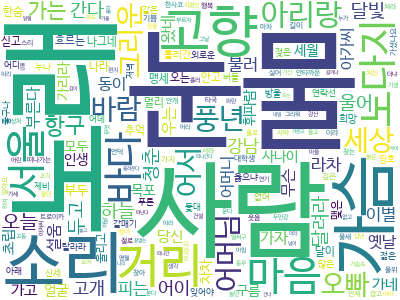

In [48]:
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

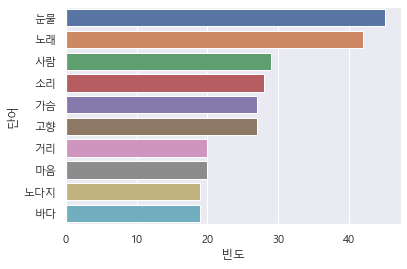

In [125]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

---

## 1950 년대 

In [91]:
year50 = years[years['year']==1950]
lyric50 = year50.Lyric

In [92]:
tagging_okt = []
for i in lyric50:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [93]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [95]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [96]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)

In [97]:
tdm.shape

(5520, 1865)

In [98]:
cv.get_feature_names()[:10]

['가고', '가기', '가나', '가냘퍼', '가네', '가느냐', '가느니', '가는', '가닥', '가더라']

In [99]:
len(cv.get_feature_names())

1865

In [100]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [101]:
wc = wc.sort_values('빈도', ascending=False)
wc.head(30)

,단어,빈도
108,고향,42
29,가슴,39
989,소리,37
325,눈물,36
303,노래,35
1257,오동동,30
539,리리,20
553,마음,20
71,거리,19
7,가는,18


In [102]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic


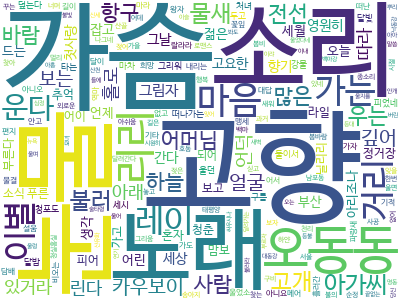

In [105]:
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

In [106]:
import seaborn as sns
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

In [107]:
wc10 = wc.head(10)

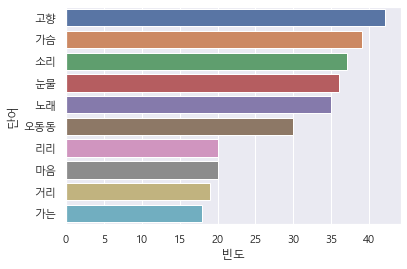

In [108]:
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

---

## 1960 년대

In [10]:
years = pd.read_csv('pre_years.csv')

In [11]:
year60 = years[years['year']==1960]
lyric60 = year60.Lyric

In [12]:
tagging_okt = []
for i in lyric60:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [13]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [14]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [19]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)

In [23]:
print(tdm.shape)
print(len(cv.get_feature_names()))

(5295, 1601)
1601


In [21]:
cv.get_feature_names()[:10]

['가가', '가겠노라고', '가고', '가나', '가냘픈', '가네', '가느냐', '가는', '가는가', '가는지']

In [24]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
485,마음,64
25,가슴,37
958,아가씨,28
784,사람,28
295,눈물,26
776,사나이,24
1377,짜기,24
7,가는,22
1052,얼굴,21
193,까투리,20


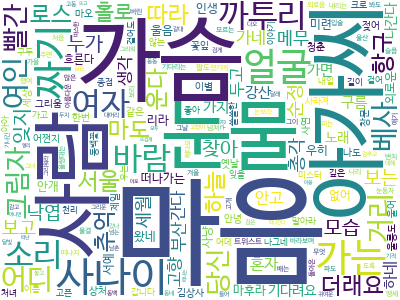

In [25]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

In [30]:
import seaborn as sns
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

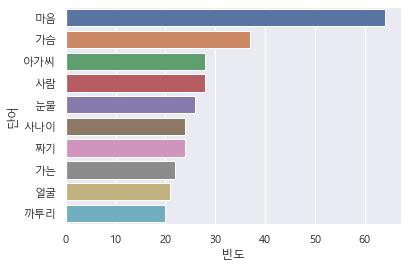

In [31]:
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

---

## 1970 년대 

In [39]:
year70 = years[years['year']==1970]
lyric70 = year70.Lyric

In [40]:
tagging_okt = []
for i in lyric70:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [41]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [42]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [43]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)

In [44]:
# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

cv.get_feature_names()[:10]

(13279, 2851)
2851


['가거', '가겠소', '가고', '가고있는', '가기전에', '가까운', '가까이', '가나', '가난', '가내']

In [45]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)


,단어,빈도
917,마음,140
634,당신,89
1435,사람,89
59,가슴,65
2636,하늘,57
517,노래,51
1039,모두,46
2659,하얀,46
1155,바람,44
2525,친구,39


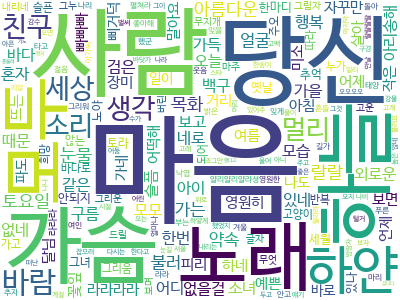

In [47]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

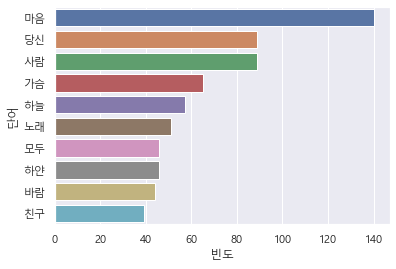

In [50]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

---

## 1980 년대

In [52]:
year80 = years[years['year']==1980]
lyric80 = year80.Lyric

In [53]:
tagging_okt = []
for i in lyric80:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [54]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [55]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [56]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)


# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

cv.get_feature_names()[:10]

(27431, 4374)
4374


['가거든', '가거라', '가게', '가고', '가고싶어', '가기', '가까운', '가까울', '가까워질듯', '가까이']

In [57]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
1322,마음,288
775,눈물,189
65,가슴,167
1514,모습,160
1691,바람,153
2106,사람,145
907,당신,138
4017,하늘,106
2198,생각,105
1497,모두,84


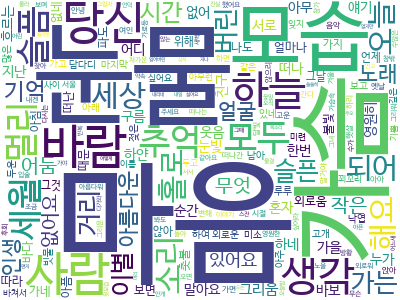

In [58]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

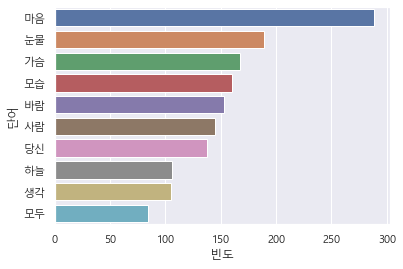

In [59]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

---

## 1990 년대

In [60]:
year90 = years[years['year']==1990]
lyric90 = year90.Lyric

tagging_okt = []
for i in lyric90:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [61]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [62]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [63]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)


# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

cv.get_feature_names()[:10]

(81699, 5000)
5000


['가게', '가겠죠', '가겠지', '가고', '가고있어', '가까운', '가까이', '가깝게', '가끔', '가나']

In [64]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
1461,마음,470
1703,모두,379
2522,세상,379
3174,없어,364
1724,모습,337
2449,생각,318
2353,사람,300
2682,시간,269
839,눈물,266
475,기억,226


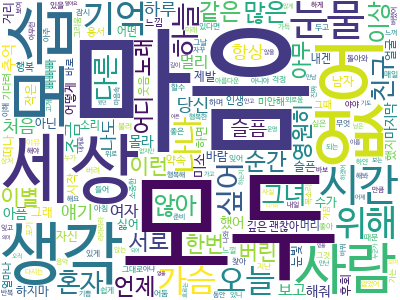

In [68]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

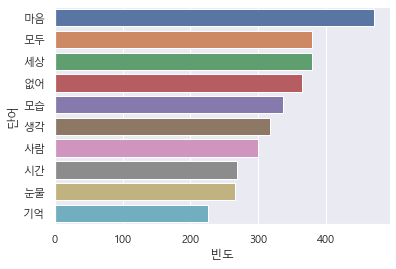

In [69]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

---

## 2000 년대

In [71]:
year20 = years[years['year']==2000]
lyric20 = year20.Lyric

In [72]:
tagging_okt = []
for i in lyric20:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [73]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [74]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [75]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)


# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

cv.get_feature_names()[:10]

(160989, 5000)
5000


['가게', '가겠어', '가겠죠', '가겠지', '가고', '가기', '가까워', '가까이', '가끔', '가나']

In [76]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
2459,사람,728
816,눈물,640
2668,세상,609
1364,마음,572
58,가슴,547
1626,모두,524
3369,없어,509
445,기억,459
2582,생각,448
2846,시간,417


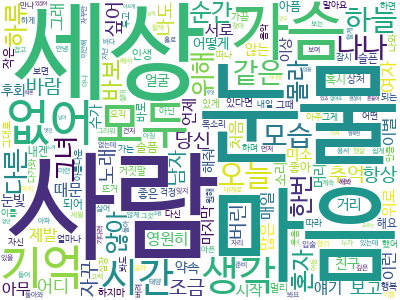

In [77]:
wc.sort_values('빈도', ascending=False).head(30)

WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

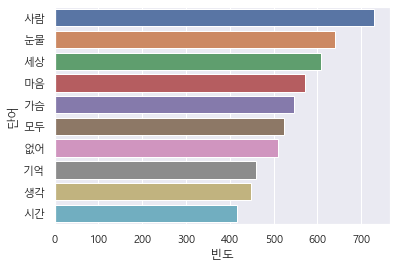

In [78]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

## 2010 년대

In [84]:
year2010 = years[years['year']== 2010]
lyric2010 = year2010.Lyric

tagging_okt = []
for i in lyric2010:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [85]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [86]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [87]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)


# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

cv.get_feature_names()[:10]

(138964, 5000)
5000


['가가', '가게', '가겠지', '가고', '가기', '가까운', '가까워지는', '가까이', '가끔', '가나']

In [88]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
2470,사람,553
3368,오늘,526
2552,생각,517
1497,마음,509
2780,시간,446
3258,없어,345
2623,세상,340
1736,모두,301
155,같은,296
522,기억,293


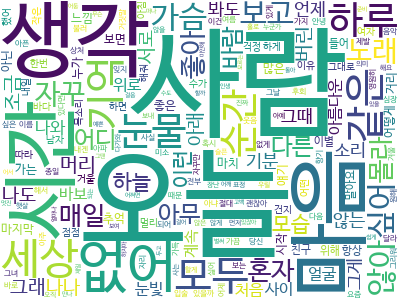

In [89]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

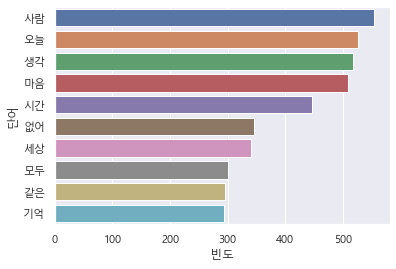

In [90]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

---

### 전체 코드

In [ ]:
year60 = years[years['year']==1960]
lyric60 = year60.Lyric

tagging_okt = []
for i in lyric60:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)
    
    
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])
            
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)


cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)


# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

cv.get_feature_names()[:10]




wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic

cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()


# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc10 = wc.sort_values('빈도', ascending=False).head(10)
sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'


####################################
import seaborn as sns
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

wc10 = wc.head(10)

sns.barplot(wc10['빈도'],wc10['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'